# 1. Import and Install Dependencies

In [1]:
#!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
#len(results.left_hand_landmarks.landmark)

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

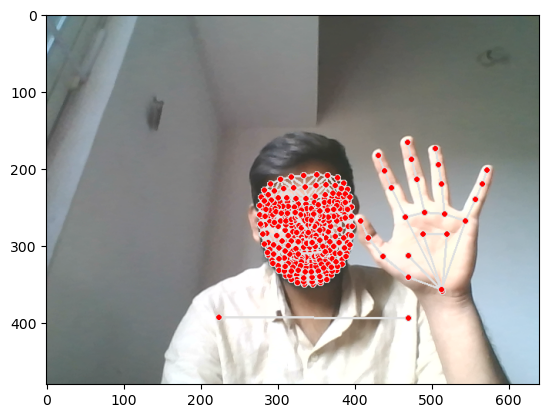

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.face_landmarks.landmark)

468

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    #lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    #rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.53280479,  0.59149039, -0.71761107, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.53280479,  0.59149039, -0.71761107, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','family','thank_you','please','help','yes','NO','sorry','house'])
#path='vid/'

# Thirty videos worth of data
no_sequences = 9

# Videos are going to be 30 frames in length
sequence_length = 9

In [23]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
import time
start = time.time()
"the code you want to test stays here"
for action in actions:
    cap = cv2.VideoCapture(0)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions

        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

    
end = time.time()
print(end - start)

250.62381315231323


In [26]:
cap.release()
cv2.destroyAllWindows()

In [27]:
keypoints

array([ 0.48323646,  0.47006828, -0.68228889, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
lh

array([ 8.02352309e-01,  7.45216906e-01,  3.31332728e-07,  7.35121608e-01,
        7.11004317e-01, -1.51020093e-02,  6.83408797e-01,  6.55582249e-01,
       -2.04296801e-02,  6.54647589e-01,  6.05325997e-01, -2.59462614e-02,
        6.38881326e-01,  5.59286773e-01, -3.06808613e-02,  7.28530109e-01,
        5.49556673e-01, -2.65611731e-03,  7.00858295e-01,  4.70352441e-01,
       -1.47231845e-02,  6.85978711e-01,  4.23174590e-01, -2.62620579e-02,
        6.74673140e-01,  3.82947803e-01, -3.50617208e-02,  7.68425584e-01,
        5.35563231e-01, -7.66196661e-03,  7.51756907e-01,  4.47199523e-01,
       -1.61391981e-02,  7.42090464e-01,  3.91757011e-01, -2.73242500e-02,
        7.33890295e-01,  3.47794831e-01, -3.59858684e-02,  8.09263706e-01,
        5.39712131e-01, -1.64007656e-02,  8.02011013e-01,  4.58647460e-01,
       -3.00109014e-02,  7.96317220e-01,  4.07273829e-01, -4.17896509e-02,
        7.89999962e-01,  3.63842368e-01, -4.99810614e-02,  8.50508690e-01,
        5.60041785e-01, -

# 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0,
 'family': 1,
 'thank_you': 2,
 'please': 3,
 'help': 4,
 'yes': 5,
 'NO': 6,
 'sorry': 7,
 'house': 8}

In [32]:

sequences, labels = [], []
s=0
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
            s+=1
        sequences.append(window)
        labels.append(label_map[action])
print(s)

729


In [33]:
np.array(sequences).shape

(81, 9, 1662)

In [34]:
np.array(sequences).shape

(81, 9, 1662)

In [35]:
np.array(labels).shape

(81,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(81, 9, 1662)

In [38]:
y = to_categorical(labels,num_classes=9).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
y_test.shape

(5, 9)

# 7. Build and Train LSTM Neural Network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(9,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [44]:
res = [.7, 0.2, 0.1,0.3,0.4,0.5,0.6,0.8,0.9]

In [45]:
actions[np.argmax(res)]

'house'

In [46]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [47]:
X_train.shape

(76, 9, 1662)

In [48]:
y_train.shape

(76, 9)

In [49]:
X_test.shape

(5, 9, 1662)

In [50]:
y_test.shape

(5, 9)

In [ ]:
model.fit(X_train, y_train, epochs=3000, callbacks=[tb_callback])

Epoch 1/3000
3/3 [==============================] - 8s 52ms/step - loss: 2.2020 - categorical_accuracy: 0.1184
Epoch 2/3000
3/3 [==============================] - 0s 56ms/step - loss: 2.2148 - categorical_accuracy: 0.0789
Epoch 3/3000
3/3 [==============================] - 0s 68ms/step - loss: 2.1994 - categorical_accuracy: 0.0658
Epoch 4/3000
3/3 [==============================] - 0s 67ms/step - loss: 2.1984 - categorical_accuracy: 0.1184
Epoch 5/3000
3/3 [==============================] - 0s 52ms/step - loss: 2.1782 - categorical_accuracy: 0.1184
Epoch 6/3000
3/3 [==============================] - 0s 44ms/step - loss: 2.1429 - categorical_accuracy: 0.1447
Epoch 7/3000
3/3 [==============================] - 0s 41ms/step - loss: 2.1086 - categorical_accuracy: 0.1184
Epoch 8/3000
3/3 [==============================] - 0s 45ms/step - loss: 1.9611 - categorical_accuracy: 0.3026
Epoch 9/3000
3/3 [==============================] - 0s 45ms/step - loss: 2.1140 - categorical_accuracy: 0.2105
E

In [ ]:
model.summary()

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

# 9. Save Weights

In [ ]:
model.save('prototype1.h5')

In [ ]:
#del model

In [ ]:

model.load_weights('prototype1.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))